In [814]:
import pandas as pd
import seaborn as sb
from datetime import datetime
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load Data

### Eye States

In [815]:
eye_states = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking try/data/left_right_1/3d_eye_states.csv')

In [816]:
eye_states.head(2)

,section id,recording id,timestamp [ns],pupil diameter [mm],eyeball center left x [mm],eyeball center left y [mm],eyeball center left z [mm],eyeball center right x [mm],eyeball center right y [mm],eyeball center right z [mm],optical axis left x,optical axis left y,optical axis left z,optical axis right x,optical axis right y,optical axis right z
0,314b6274-7746-40e9-8d39-cbc46ab16dc9,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548527972841155,4.400507,-30.954063,10.943527,-42.904373,31.779869,8.937256,-45.450989,0.668765,0.150978,0.727982,0.554670,0.165521,0.815441
1,314b6274-7746-40e9-8d39-cbc46ab16dc9,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548527977841155,4.393271,-30.971268,11.009438,-42.935429,31.784168,9.055771,-45.459171,0.667736,0.139698,0.731172,0.554371,0.154230,0.817854


In [817]:
eye_states.shape

(3392, 16)

In [818]:
eye_states.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'pupil diameter [mm]',
       'eyeball center left x [mm]', 'eyeball center left y [mm]',
       'eyeball center left z [mm]', 'eyeball center right x [mm]',
       'eyeball center right y [mm]', 'eyeball center right z [mm]',
       'optical axis left x', 'optical axis left y', 'optical axis left z',
       'optical axis right x', 'optical axis right y', 'optical axis right z'],
      dtype='object')

In [819]:
column_names_states = {'section id': 'section_id',
                       'recording id': 'recording_id',
                       'timestamp [ns]': 'timestamp',
                       'pupil diameter [mm]': 'pupil_diameter',
                       'eyeball center left x [mm]': 'eyeball_center_lx',
                       'eyeball center left y [mm]': 'eyeball_center_ly',
                       'eyeball center left z [mm]': 'eyeball_center_lz',
                       'eyeball center right x [mm]': 'eyeball_center_rx',
                       'eyeball center right y [mm]': 'eyeball_center_ry',
                       'eyeball center right z [mm]': 'eyeball_center_rz',
                       'optical axis left x': 'optical_axis_lx',
                       'optical axis left y': 'optical_axis_ly',
                       'optical axis left z': 'optical_axis_lz',
                       'optical axis right x': 'optical_axis_rx',
                       'optical axis right y': 'optical_axis_ry',
                       'optical axis right z': 'optical_axis_rz'}

eye_states = eye_states.rename(columns=column_names_states)

In [820]:
eye_states.head(2)

,section_id,recording_id,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,eyeball_center_rx,eyeball_center_ry,eyeball_center_rz,optical_axis_lx,optical_axis_ly,optical_axis_lz,optical_axis_rx,optical_axis_ry,optical_axis_rz
0,314b6274-7746-40e9-8d39-cbc46ab16dc9,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548527972841155,4.400507,-30.954063,10.943527,-42.904373,31.779869,8.937256,-45.450989,0.668765,0.150978,0.727982,0.554670,0.165521,0.815441
1,314b6274-7746-40e9-8d39-cbc46ab16dc9,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548527977841155,4.393271,-30.971268,11.009438,-42.935429,31.784168,9.055771,-45.459171,0.667736,0.139698,0.731172,0.554371,0.154230,0.817854


In [821]:
eye_states_short = eye_states[['timestamp', 'pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly', 'eyeball_center_lz', 'optical_axis_lx', 'optical_axis_ly', 'optical_axis_lz']]

In [822]:
eye_states_short.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz
0,1706548527972841155,4.400507,-30.954063,10.943527,-42.904373,0.668765,0.150978,0.727982
1,1706548527977841155,4.393271,-30.971268,11.009438,-42.935429,0.667736,0.139698,0.731172


### Gaze

In [823]:
gaze = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking try/data/left_right_1/gaze.csv')

In [824]:
gaze.head(2)

,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,azimuth [deg],elevation [deg]
0,314b6274-7746-40e9-8d39-cbc46ab16dc9,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548527972841155,1509.113,630.542,1.0,NaN,NaN,45.743824,-1.153173
1,314b6274-7746-40e9-8d39-cbc46ab16dc9,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548527977841155,1508.980,631.617,1.0,NaN,NaN,45.735619,-1.216085


In [825]:
column_names_gaze = {'section id' : 'section_id',
                     'recording id' : 'recording_id',
                     'timestamp [ns]' : 'timestamp',
                     'gaze x [px]' : 'gaze_x',
                     'gaze y [px]' : 'gaze_y',
                     'fixation id' : 'fixation_id',
                     'blink id' : 'blink_id',
                     'azimuth [deg]' : 'azimuth',
                     'elevation [deg]' : 'elevation'}

gaze = gaze.rename(columns=column_names_gaze)

In [826]:
gaze_short = gaze[['timestamp', 'gaze_x', 'gaze_y', 'azimuth', 'elevation']]

### Events

In [827]:
events = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking try/data/left_right_1/events.csv')

In [828]:
events.head(2)

,recording id,timestamp [ns],name,type
0,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548526297000000,recording.begin,recording
1,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548529749240000,left.start,cloud


In [829]:
events.columns

Index(['recording id', 'timestamp [ns]', 'name', 'type'], dtype='object')

In [830]:
events = events.rename(columns={'recording id' : 'recording_id', 'timestamp [ns]' : 'timestamp'})

In [831]:
events.head(2)

,recording_id,timestamp,name,type
0,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548526297000000,recording.begin,recording
1,9d2fe463-2d08-476c-9ba8-57d06914e18b,1706548529749240000,left.start,cloud


In [832]:
events_short = events[['timestamp', 'name']]

## Merge datasets

In [833]:
eye_states_gaze = eye_states_short.merge(gaze_short, on='timestamp')

In [834]:
eye_states_gaze.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation
0,1706548527972841155,4.400507,-30.954063,10.943527,-42.904373,0.668765,0.150978,0.727982,1509.113,630.542,45.743824,-1.153173
1,1706548527977841155,4.393271,-30.971268,11.009438,-42.935429,0.667736,0.139698,0.731172,1508.980,631.617,45.735619,-1.216085


In [835]:
eye_states_gaze.shape

(3392, 12)

In [836]:
eye_states_gaze_events = eye_states_gaze.merge(events_short, how='outer', on='timestamp')

In [837]:
eye_states_gaze_events.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name
0,1706548526297000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recording.begin
1,1706548527972841155,4.400507,-30.954063,10.943527,-42.904373,0.668765,0.150978,0.727982,1509.113,630.542,45.743824,-1.153173,NaN


## Timestamps to date

In [838]:
eye_states_gaze_events['timestamp_data'] = [datetime.fromtimestamp(ts // 1000000000) for ts in eye_states_gaze_events['timestamp']]

In [876]:
eye_states_gaze_events

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1706548526297000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recording.begin,2024-01-29 12:15:26
1,1706548527972841155,4.400507,-30.954063,10.943527,-42.904373,0.668765,0.150978,0.727982,1509.113,630.542,45.743824,-1.153173,NaN,2024-01-29 12:15:27
2,1706548527977841155,4.393271,-30.971268,11.009438,-42.935429,0.667736,0.139698,0.731172,1508.980,631.617,45.735619,-1.216085,NaN,2024-01-29 12:15:27
3,1706548527982841155,4.416283,-30.960403,10.955486,-43.152336,0.659068,0.149053,0.737166,1505.988,636.410,45.538098,-1.497629,NaN,2024-01-29 12:15:27
4,1706548527987842155,4.375106,-31.095406,11.030838,-43.054916,0.670883,0.143164,0.727612,1503.747,633.722,45.384740,-1.341200,NaN,2024-01-29 12:15:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,1706548545429027155,4.615670,-30.385132,9.416206,-43.973793,0.155316,0.314182,0.936572,861.746,808.317,3.581123,-12.872572,NaN,2024-01-29 12:15:45
3404,1706548545434027155,4.606209,-30.430885,9.503151,-44.088055,0.158395,0.305925,0.938787,859.763,812.914,3.452298,-13.171601,NaN,2024-01-29 12:15:45
3405,1706548545439027155,4.637825,-30.498497,9.405804,-44.048691,0.163724,0.307906,0.937224,858.996,812.287,3.401064,-13.131212,NaN,2024-01-29 12:15:45
3406,1706548545444027155,4.612514,-30.390335,9.488983,-44.013309,0.154247,0.305902,0.939485,860.582,806.662,3.503003,-12.765539,NaN,2024-01-29 12:15:45


## Separate Left and Right parts

### Left

In [840]:
filtered_left_indexes = eye_states_gaze_events[(eye_states_gaze_events['name'] == 'left.start') |
                                       (eye_states_gaze_events['name'] == 'left.end')].index

In [841]:
filtered_left_indexes

Index([297, 445, 873, 1142, 1669, 1981, 2440, 2801], dtype='int64')

In [842]:
filtered_left = pd.DataFrame()
for i in range(0, len(filtered_left_indexes), 2):
    filtered_left = pd.concat([filtered_left, eye_states_gaze_events.loc[filtered_left_indexes[i]:filtered_left_indexes[i+1]]])

In [843]:
filtered_left.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
297,1706548529749240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left.start,2024-01-29 12:15:29
298,1706548529749475155,4.998295,-31.502335,11.016953,-45.538109,-0.289663,0.216337,0.932359,436.667,781.422,-24.338445,-10.741292,NaN,2024-01-29 12:15:29


In [844]:
filtered_left['name'] = filtered_left['name'].apply(lambda x: 'left' if pd.isna(x) else x)

In [845]:
filtered_left.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
297,1706548529749240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left.start,2024-01-29 12:15:29
298,1706548529749475155,4.998295,-31.502335,11.016953,-45.538109,-0.289663,0.216337,0.932359,436.667,781.422,-24.338445,-10.741292,left,2024-01-29 12:15:29


In [846]:
left = filtered_left.dropna().reset_index(drop=True)

In [847]:
left.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1706548529749475155,4.998295,-31.502335,11.016953,-45.538109,-0.289663,0.216337,0.932359,436.667,781.422,-24.338445,-10.741292,left,2024-01-29 12:15:29
1,1706548529754472155,5.010161,-31.518356,10.854866,-45.421600,-0.283622,0.235413,0.929591,432.559,796.045,-24.655840,-11.650775,left,2024-01-29 12:15:29


In [848]:
left.shape

(1086, 14)

### Right

In [849]:
filtered_right_indexes = eye_states_gaze_events[(eye_states_gaze_events['name'] == 'right.start') |
                                       (eye_states_gaze_events['name'] == 'right.end')].index

In [850]:
filtered_right_indexes

Index([560, 784, 1233, 1581, 2126, 2375], dtype='int64')

In [851]:
filtered_right = pd.DataFrame()
for i in range(0, len(filtered_right_indexes), 2):
    filtered_right  = pd.concat([filtered_right, eye_states_gaze_events.loc[filtered_right_indexes[i]:filtered_right_indexes[i+1]]])

In [852]:
filtered_right.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
560,1706548531082565000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right.start,2024-01-29 12:15:31
561,1706548531085727155,5.128878,-30.526752,10.722137,-41.400314,0.525582,0.280142,0.803296,1302.627,763.916,32.427753,-9.420026,NaN,2024-01-29 12:15:31


In [853]:
filtered_right['name'] = filtered_right['name'].apply(lambda x: 'right' if pd.isna(x) else x)

In [854]:
filtered_right.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
560,1706548531082565000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right.start,2024-01-29 12:15:31
561,1706548531085727155,5.128878,-30.526752,10.722137,-41.400314,0.525582,0.280142,0.803296,1302.627,763.916,32.427753,-9.420026,right,2024-01-29 12:15:31


In [855]:
right = filtered_right.dropna().reset_index(drop=True)

In [856]:
right.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1706548531085727155,5.128878,-30.526752,10.722137,-41.400314,0.525582,0.280142,0.803296,1302.627,763.916,32.427753,-9.420026,right,2024-01-29 12:15:31
1,1706548531090729155,5.088425,-30.421314,10.546413,-40.880898,0.531312,0.294098,0.794490,1304.065,769.189,32.543725,-9.740852,right,2024-01-29 12:15:31


In [857]:
right.shape

(818, 14)

## Select data for ML

In [858]:
left_right = pd.concat([left, right], axis=0)

In [859]:
left_right.shape

(1904, 14)

In [860]:
left_right.head()

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1706548529749475155,4.998295,-31.502335,11.016953,-45.538109,-0.289663,0.216337,0.932359,436.667,781.422,-24.338445,-10.741292,left,2024-01-29 12:15:29
1,1706548529754472155,5.010161,-31.518356,10.854866,-45.421600,-0.283622,0.235413,0.929591,432.559,796.045,-24.655840,-11.650775,left,2024-01-29 12:15:29
2,1706548529759472155,4.998164,-31.426540,10.832436,-45.344673,-0.280748,0.233001,0.931070,433.219,784.679,-24.573408,-10.938989,left,2024-01-29 12:15:29
3,1706548529764472155,5.033319,-31.453854,10.881645,-45.339127,-0.275533,0.232714,0.932698,434.531,778.742,-24.468607,-10.568828,left,2024-01-29 12:15:29
4,1706548529769472155,5.057612,-31.428337,10.976414,-45.386768,-0.280906,0.222561,0.933573,434.817,775.065,-24.438416,-10.338505,left,2024-01-29 12:15:29


In [861]:
left_right.columns

Index(['timestamp', 'pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly',
       'eyeball_center_lz', 'optical_axis_lx', 'optical_axis_ly',
       'optical_axis_lz', 'gaze_x', 'gaze_y', 'azimuth', 'elevation', 'name',
       'timestamp_data'],
      dtype='object')

In [862]:
X_to_corr = left_right[['pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly', 'eyeball_center_lz', 'optical_axis_ly', 'azimuth',  'elevation']]

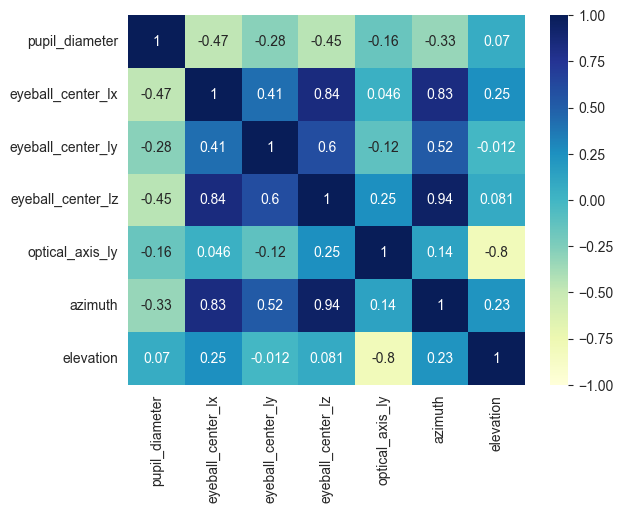

In [863]:
dataplot = sb.heatmap(X_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

In [864]:
X = X_to_corr.values

In [865]:
X

array([[  4.99829483, -31.50233459,  11.01695251, ...,   0.21633711,
        -24.33844503, -10.74129175],
       [  5.0101614 , -31.51835632,  10.85486603, ...,   0.23541261,
        -24.65584041, -11.65077493],
       [  4.9981637 , -31.42654037,  10.83243561, ...,   0.23300132,
        -24.57340823, -10.93898914],
       ...,
       [  2.77108645, -30.3511734 ,  11.77468109, ...,   0.17758918,
          4.61215992,  -6.33003682],
       [  2.76171374, -29.84500122,  11.49399567, ...,   0.15092708,
          0.51328726,  -2.98367932],
       [  2.76012421, -29.64413452,  11.88282013, ...,   0.21423072,
         -3.2942897 ,  -1.76994481]])

In [866]:
y = left_right['name'].values

In [867]:
y

array(['left', 'left', 'left', ..., 'right', 'right', 'right'],
      dtype=object)

### Preprocessing

In [868]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [869]:
sc = StandardScaler()

In [870]:
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [871]:
X_train

array([[-0.21755488, -0.96212508,  0.88101542, ..., -1.26708024,
        -0.8554613 , -0.0047659 ],
       [ 0.58264953, -0.54504516,  2.26911674, ..., -2.56793479,
        -0.76069323,  0.94527669],
       [-0.76069038,  1.59686814,  1.26765822, ...,  1.36219454,
         1.31242734, -1.47090875],
       ...,
       [ 1.26708208, -0.13435783,  0.07348932, ..., -0.48538128,
        -0.76279968, -0.27886575],
       [ 0.47928507,  0.52113323,  0.74854594, ...,  0.27948303,
         1.28009243,  0.43381701],
       [-1.00617375,  1.33948153,  2.24583973, ...,  1.13126835,
         1.2863469 , -1.34599375]])

### K-Nearest Neighbors Classifier

In [872]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [873]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[['left' 'left']
 ['left' 'left']
 ['right' 'right']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['right' 'right']
 ['left' 'left']
 ['right' 'right']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['right' 'right']
 ['left' 'left']
 ['right' 'right']
 ['right' 'right']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['right' 'right']
 ['left' 'left']
 ['right' 'right']
 ['right' 'right']
 ['left' 'left']
 ['right' 'right']
 ['right' 'right']
 ['right' 'right']
 ['left' 'left']
 ['left' 'left']
 ['right' 'right']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['right' 'right']
 ['right' 'right']
 ['right' 'right']
 ['left' 'left']
 ['right' 'right']
 ['right' 'right']
 ['left' 'left']
 ['left' 'left']
 ['right' 'right']
 ['right' 'right']
 ['right' 'right']
 ['right' 'right']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['left' 'left']
 ['r

In [874]:
confusion_matrix(y_test, y_pred)

array([[214,   0],
       [  1, 166]])

In [875]:
accuracy_score(y_test, y_pred)

0.9973753280839895